<a href="https://colab.research.google.com/github/Gulzar-khan/ML-PRACTICE/blob/main/Assignment_Solution_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform univariate and multivariate anomaly detection on the `Sales` and `Profit` columns of the Superstore dataset.

* Use the `Local Outlier Factor` algorithm.
* Write in detail how this algorithm helps us in detecting anomalies.

[Resource](https://scikit-learn.org/stable/modules/outlier_detection.html)




In [ ]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import IsolationForest

from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/AlmaBetter/Module 3/Week 4/Day 4/Sample - Superstore.xls')

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [ ]:
df.Sales.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


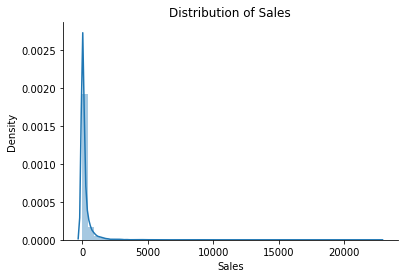

In [ ]:
sns.distplot(df['Sales'])
plt.title("Distribution of Sales")
sns.despine()

In [ ]:
print("Skewness: %f" % df['Sales'].skew())
print("Kurtosis: %f" % df['Sales'].kurt())

Skewness: 12.972752
Kurtosis: 305.311753


In [ ]:
df.Profit.describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

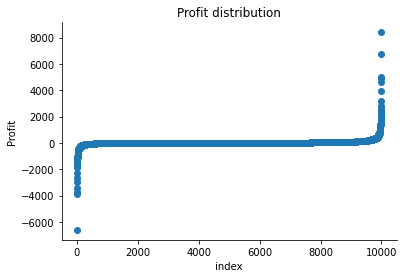

In [ ]:
plt.scatter(range(df.shape[0]), np.sort(df['Profit'].values))
plt.xlabel('index')
plt.ylabel('Profit')
plt.title("Profit distribution")
sns.despine()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


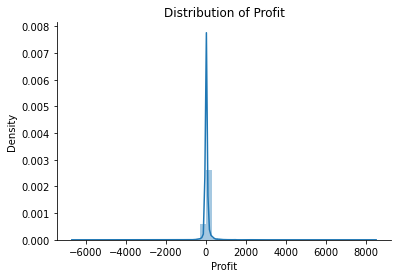

In [ ]:
sns.distplot(df['Profit'])
plt.title("Distribution of Profit")
sns.despine()

In [ ]:
print("Skewness: %f" % df['Profit'].skew())
print("Kurtosis: %f" % df['Profit'].kurt())

Skewness: 7.561432
Kurtosis: 397.188515


In [ ]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1,novelty=True)
clf.fit(df['Sales'].values.reshape(-1, 1))
df['anomaly_score_univariate_sales'] = clf.decision_function(df['Sales'].values.reshape(-1, 1))
df['outlier_univariate_sales'] = clf.predict(df['Sales'].values.reshape(-1, 1))

In [ ]:
df.sort_values('anomaly_score_univariate_sales')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales
3233,3234,US-2017-156356,2017-04-16,2017-04-22,Standard Class,ND-18370,Natalie DeCherney,Consumer,United States,Houston,Texas,77095,Central,OFF-ST-10002301,Office Supplies,Storage,Tennsco Commercial Shelving,32.544,2,0.2,-7.7292,-5.768000e+08,-1
7366,7367,CA-2016-127243,2016-11-28,2016-12-04,Standard Class,DS-13180,David Smith,Corporate,United States,Philadelphia,Pennsylvania,19140,East,OFF-ST-10002301,Office Supplies,Storage,Tennsco Commercial Shelving,32.544,2,0.2,-7.7292,-5.768000e+08,-1
8546,8547,CA-2016-119074,2016-03-27,2016-03-31,Standard Class,DS-13180,David Smith,Corporate,United States,Columbus,Georgia,31907,South,OFF-BI-10000962,Office Supplies,Binders,Acco Flexible ACCOHIDE Square Ring Data Binder...,32.540,2,0.0,15.9446,-5.688000e+08,-1
3737,3738,CA-2016-115476,2016-03-17,2016-03-17,Same Day,VM-21835,Vivian Mathis,Consumer,United States,Newark,Delaware,19711,East,OFF-BI-10000962,Office Supplies,Binders,Acco Flexible ACCOHIDE Square Ring Data Binder...,32.540,2,0.0,15.9446,-5.688000e+08,-1
6825,6826,CA-2016-118689,2016-10-02,2016-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,OFF-ST-10001558,Office Supplies,Storage,Acco Perma 4000 Stacking Storage Drawers,32.480,2,0.0,4.8720,-5.352000e+08,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,5593,CA-2014-164742,2014-10-13,2014-10-18,Second Class,ML-17395,Marina Lichtenstein,Corporate,United States,Lakewood,New Jersey,8701,East,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,18.940,1,0.0,9.4700,4.084906e-01,1
2701,2702,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,South,OFF-FA-10003112,Office Supplies,Fasteners,Staples,18.936,3,0.2,5.9175,4.114374e-01,1
3386,3387,CA-2017-148404,2017-10-07,2017-10-11,Standard Class,Dp-13240,Dean percer,Home Office,United States,Charlotte,North Carolina,28205,South,OFF-FA-10003112,Office Supplies,Fasteners,Staples,18.936,3,0.2,5.9175,4.114374e-01,1
7848,7849,CA-2016-104311,2016-05-02,2016-05-06,Standard Class,AS-10090,Adam Shillingsburg,Consumer,United States,Irving,Texas,75061,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,18.936,3,0.2,-3.7872,4.114374e-01,1


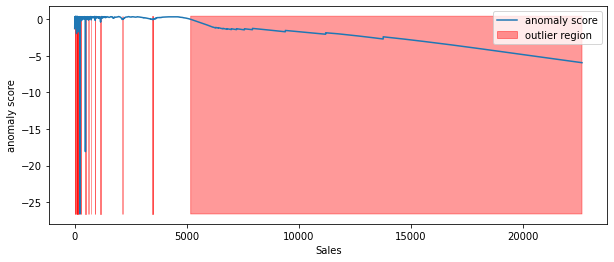

In [ ]:
xx = np.linspace(df['Sales'].min(), df['Sales'].max(), len(df)).reshape(-1,1)
anomaly_score = clf.decision_function(xx)
outlier = clf.predict(xx)

plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Sales')
plt.show();


## Anomaly detection on Profit

In [ ]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1,novelty=True)
clf.fit(df['Profit'].values.reshape(-1, 1))
df['anomaly_score_univariate_profit'] = clf.decision_function(df['Profit'].values.reshape(-1, 1))
df['outlier_univariate_profit'] = clf.predict(df['Profit'].values.reshape(-1, 1))

In [ ]:
df.sort_values('anomaly_score_univariate_profit')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit
1566,1567,CA-2015-129112,2015-11-29,2015-11-30,First Class,AW-10840,Anthony Witt,Consumer,United States,Allen,Texas,75002,Central,TEC-AC-10003038,Technology,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,21.480,3,0.2,-0.2685,0.193072,1,-1.907255e+09,-1
1496,1497,CA-2017-152485,2017-09-04,2017-09-08,Standard Class,JD-15790,John Dryer,Consumer,United States,Coppell,Texas,75019,Central,OFF-ST-10004950,Office Supplies,Storage,Acco Perma 3000 Stacking Storage Drawers,16.784,1,0.2,-0.2098,0.338088,1,-1.599080e+09,-1
7413,7414,CA-2017-121125,2017-05-30,2017-06-03,Standard Class,MG-17890,Michael Granlund,Home Office,United States,Tigard,Oregon,97224,West,FUR-FU-10000820,Furniture,Furnishings,Tensor Brushed Steel Torchiere Floor Lamp,13.592,1,0.2,-0.3398,0.233007,1,-9.052350e+08,-1
4660,4661,CA-2015-112130,2015-05-03,2015-05-07,Standard Class,SV-20785,Stewart Visinsky,Consumer,United States,Philadelphia,Pennsylvania,19140,East,TEC-AC-10001542,Technology,Accessories,SanDisk Cruzer 16 GB USB Flash Drive,27.552,3,0.2,-0.3444,0.272961,1,-9.052350e+08,-1
3228,3229,CA-2014-108189,2014-10-02,2014-10-05,First Class,ES-14080,Erin Smith,Corporate,United States,Tempe,Arizona,85281,West,TEC-AC-10003038,Technology,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,7.160,1,0.2,-0.0895,0.339501,1,-8.502500e+08,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6917,6918,CA-2014-124247,2014-12-16,2014-12-21,Standard Class,SH-20635,Stefanie Holloman,Corporate,United States,Sacramento,California,95823,West,FUR-CH-10001854,Furniture,Chairs,Office Star - Professional Matrix Back Chair w...,1403.920,5,0.2,70.1960,0.304003,1,2.415135e-01,1
9759,9760,CA-2016-146913,2016-10-31,2016-11-05,Standard Class,SF-20965,Sylvia Foulston,Corporate,United States,San Francisco,California,94109,West,FUR-CH-10001854,Furniture,Chairs,Office Star - Professional Matrix Back Chair w...,1403.920,5,0.2,70.1960,0.304003,1,2.415135e-01,1
5060,5061,CA-2016-109722,2016-12-05,2016-12-07,Second Class,TP-21130,Theone Pippenger,Consumer,United States,Georgetown,Kentucky,40324,South,OFF-ST-10000060,Office Supplies,Storage,Fellowes Bankers Box Staxonsteel Drawer File/S...,584.820,9,0.0,70.1784,0.290893,1,2.415877e-01,1
9143,9144,US-2017-166688,2017-05-20,2017-05-26,Standard Class,RD-19480,Rick Duston,Consumer,United States,Las Vegas,Nevada,89115,West,TEC-PH-10004094,Technology,Phones,Motorola L703CM,1123.128,9,0.2,70.1955,0.356488,1,2.415877e-01,1


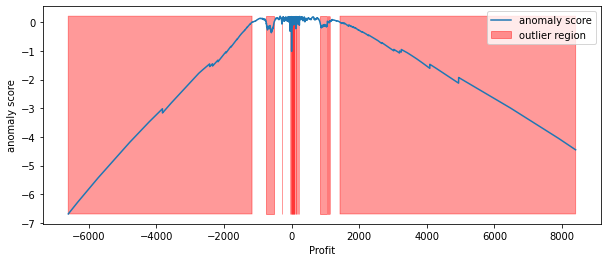

In [ ]:
xx = np.linspace(df['Profit'].min(), df['Profit'].max(), len(df)).reshape(-1,1)
anomaly_score = clf.decision_function(xx)
outlier = clf.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
                 where=outlier==-1, color='r',
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Profit')
plt.show();

In [ ]:
df[(df['outlier_univariate_profit']==-1) & (df['outlier_univariate_sales']==-1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit
63,64,CA-2015-135545,2015-11-24,2015-11-30,Standard Class,KM-16720,Kunst Miller,Consumer,United States,Los Angeles,California,90004,West,OFF-BI-10001078,Office Supplies,Binders,"Acco PRESSTEX Data Binder with Storage Hooks, ...",25.824,6,0.2,9.3612,-4.427983e+08,-1,-1.123150e+08,-1
165,166,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,78207,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,8159.952,8,0.4,-1359.9920,-1.309234e+00,-1,-2.439042e-01,-1
375,376,US-2014-119137,2014-07-23,2014-07-27,Standard Class,AG-10900,Arthur Gainer,Consumer,United States,Tucson,Arizona,85705,West,TEC-AC-10002076,Technology,Accessories,Microsoft Natural Keyboard Elite,479.040,10,0.2,-29.9400,-1.980651e+01,-1,-4.278177e-02,-1
403,404,CA-2014-155208,2014-04-16,2014-04-20,Standard Class,SP-20650,Stephanie Phelps,Corporate,United States,Wilmington,North Carolina,28403,South,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,39.072,6,0.2,9.7680,-1.585887e-02,-1,-1.099511e-02,-1
509,510,CA-2015-145352,2015-03-16,2015-03-22,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,Atlanta,Georgia,30318,South,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,6354.950,5,0.0,3177.4750,-1.161001e+00,-1,-1.063013e+00,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9491,9492,CA-2017-111738,2017-01-03,2017-01-07,Standard Class,CM-12385,Christopher Martinez,Consumer,United States,San Francisco,California,94110,West,OFF-AR-10000817,Office Supplies,Art,Manco Dry-Lighter Erasable Highlighter,9.120,3,0.0,3.1008,-2.481477e-03,-1,-3.750111e-01,-1
9657,9658,CA-2014-156160,2014-09-22,2014-09-29,Standard Class,AS-10090,Adam Shillingsburg,Consumer,United States,New York City,New York,10035,East,OFF-AR-10003876,Office Supplies,Art,Avery Hi-Liter GlideStik Fluorescent Highlight...,13.040,4,0.0,5.7376,-9.223997e-02,-1,-2.221947e-01,-1
9729,9730,CA-2014-111962,2014-09-29,2014-10-04,Standard Class,EB-14170,Evan Bailliet,Consumer,United States,Seattle,Washington,98115,West,OFF-BI-10001308,Office Supplies,Binders,GBC Standard Plastic Binding Systems' Combs,10.048,2,0.2,3.1400,-3.551468e-02,-1,-1.819846e+00,-1
9824,9825,US-2014-164406,2014-08-15,2014-08-19,Standard Class,BD-11605,Brian Dahlen,Consumer,United States,San Francisco,California,94122,West,OFF-BI-10002309,Office Supplies,Binders,Avery Heavy-Duty EZD Binder With Locking Rings,17.856,4,0.2,6.2496,-6.120000e+07,-1,-7.222500e+07,-1


### **Multivariate Anomaly Detection**

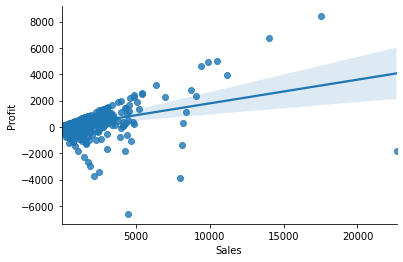

In [ ]:
sns.regplot(x="Sales", y="Profit", data=df)
sns.despine();

In [ ]:
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(df[['Sales','Profit']])

In [ ]:
clf = LocalOutlierFactor(n_neighbors=100, contamination=0.01,novelty=True)
clf.fit(X)

# predict raw anomaly score
df['multivariate_anomaly_score'] = clf.decision_function(X)

# prediction of a datapoint category outlier or inlier
df['multivariate_outlier'] = clf.predict(X)

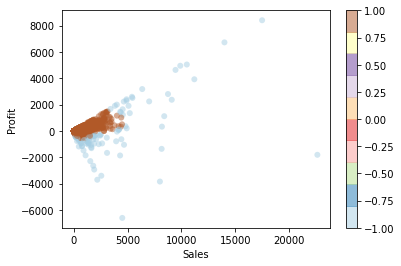

In [ ]:
plt.scatter(df['Sales'], df['Profit'],
            c=df.multivariate_outlier, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Paired', 10))
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.colorbar();

In [ ]:
df[(df['outlier_univariate_sales'] == 1) & (df['outlier_univariate_profit'] == 1) & (df['multivariate_outlier'] == -1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,anomaly_score_univariate_sales,outlier_univariate_sales,anomaly_score_univariate_profit,outlier_univariate_profit,multivariate_anomaly_score,multivariate_outlier
169,170,CA-2014-139892,2014-09-08,2014-09-12,Standard Class,BM-11140,Becky Martin,Consumer,United States,San Antonio,Texas,78207,Central,OFF-AP-10002518,Office Supplies,Appliances,Kensington 7 Outlet MasterPiece Power Center,177.9800,5,0.80,-453.8490,0.211079,1,0.131564,1,-0.066652,-1
215,216,CA-2015-146262,2015-01-02,2015-01-09,Standard Class,VW-21775,Victoria Wilson,Corporate,United States,Medina,Ohio,44256,East,TEC-MA-10000864,Technology,Machines,Cisco 9971 IP Video Phone Charcoal,1188.0000,9,0.70,-950.4000,0.205310,1,0.129556,1,-0.438146,-1
262,263,US-2014-106992,2014-09-19,2014-09-21,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,Texas,77036,Central,TEC-MA-10000822,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,3059.9820,3,0.40,-509.9970,0.209044,1,0.016983,1,-0.377032,-1
263,264,US-2014-106992,2014-09-19,2014-09-21,Second Class,SB-20290,Sean Braxton,Corporate,United States,Houston,Texas,77036,Central,TEC-MA-10003353,Technology,Machines,Xerox WorkCentre 6505DN Laser Multifunction Pr...,2519.9580,7,0.40,-251.9958,0.306652,1,0.168044,1,-0.088495,-1
353,354,CA-2016-129714,2016-09-01,2016-09-03,First Class,AB-10060,Adam Bellavance,Home Office,United States,New York City,New York,10009,East,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,4355.1680,4,0.20,1415.4296,0.350386,1,0.015677,1,-0.121897,-1
399,400,CA-2016-108987,2016-09-08,2016-09-10,Second Class,AG-10675,Anna Gayman,Consumer,United States,Houston,Texas,77036,Central,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",2396.2656,4,0.32,-317.1528,0.364061,1,0.143303,1,-0.075024,-1
463,464,CA-2016-109869,2016-04-22,2016-04-29,Standard Class,TN-21040,Tanja Norvell,Home Office,United States,Phoenix,Arizona,85023,West,FUR-TA-10001889,Furniture,Tables,Bush Advantage Collection Racetrack Conference...,1272.6300,6,0.50,-814.4832,0.354764,1,0.100227,1,-0.253965,-1
1219,1220,US-2017-118087,2017-09-09,2017-09-13,Standard Class,SP-20620,Stefania Perrino,Corporate,United States,Philadelphia,Pennsylvania,19134,East,TEC-PH-10002200,Technology,Phones,Samsung Galaxy Note 2,1931.9580,7,0.40,-386.3916,0.343950,1,0.120471,1,-0.123218,-1
1369,1370,US-2015-103471,2015-12-24,2015-12-28,Standard Class,JR-15670,Jim Radford,Consumer,United States,Colorado Springs,Colorado,80906,West,FUR-BO-10002613,Furniture,Bookcases,"Atlantic Metals Mobile 4-Shelf Bookcases, Cust...",590.0580,7,0.70,-786.7440,0.300280,1,0.069782,1,-0.395803,-1
1438,1439,CA-2015-139731,2015-10-15,2015-10-15,Same Day,JE-15745,Joel Eaton,Consumer,United States,Amarillo,Texas,79109,Central,FUR-CH-10002024,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,2453.4300,5,0.30,-350.4900,0.334598,1,0.118793,1,-0.141949,-1


## **Local Outlier Factor (LOF)**

Local outlier factor (LOF) is a technique that tells the outliers present within the dataset. But what does the local outlier mean?
When any data point is taken into account as an outlier depending upon its local neighborhood, it's a local outlier. LOF will identify an outlier considering the density of the neighbor. LOF performs well when the density of the data point isn't constant throughout the dataset.

To understand LOF, we have to understand some concepts before :

1)K-distance and K-neighbors

2)Reachability distance (RD)

3)Local reachability density (LRD)

4)Local Outlier Factor (LOF)

### **1. K-DISTANCE AND K-NEIGHBORS**


K-distance is that the distance between the data point, and it’s Kᵗʰ nearest neighbor. K-neighbors denoted by Nₖ(A) includes a group of points that inside or on the circle of radius K-distance. K-neighbors may be greater than or same as value of K. How’s this possible?
We’ll see an example. Let’s say we've four points A, B, C, and D (shown below).

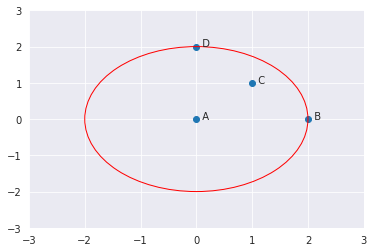

If K=2, K-neighbors of A will be C, B, and D. Here, the value of K=2 but the ||N₂(A)|| = 3. Therefore, ||Nₖ(point)|| will always be greater than or equal to K.

### **2 REACHABILITY DENSITY (RD)**

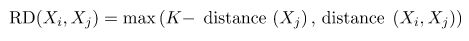

It is defined as the maximum of K-distance of Xj and the distance between Xi and Xj.






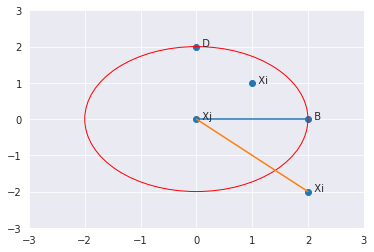

In simple words, if a data point Xi exist within the K-neighbors of Xj, the reachability distance will be  equal to K-distance of Xj (blue line), otherwise reachability distance will be  equal to the distance between Xi and Xj (orange line). Shown in above figure

### **3 LOCAL REACHABILITY DENSITY (LRD)**

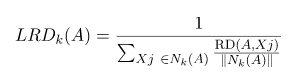

LRD is the inverse of the mean reachability distance of A from its neighbors. Intuitively as per the LRD formula, more mean reachability distance, less density of points are present around a specific point. This tells how far a data point is from the closest cluster of points. Low values of LRD implies that the closest cluster is away from the data point.

### **4. LOCAL OUTLIER FACTOR (LOF)**

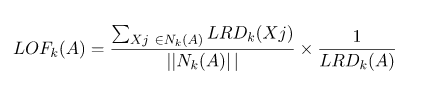

LRD of every point is considered to check with mean of LRD of its K neighbors. LOF is that the ratio of mean LRD of the K neighbors of A to the LRD of A.
By the intuition, if the data point isn't an outlier (inlier), the ratio of average LRD of neighbors is approximately same as the LRD of a data point (because the density of a point and its neighbors are almost equal). In that case, LOF is almost equal to 1. And, if the point is an outlier, the LRD of a point is less than the average LRD of neighbors. Then LOF value will be high.
Generally, if LOF is greater than 1, it is considered as an outlier, but that is not always true. Let’s say we all know that we only have one outlier within the data, then we take the utmost LOF value among all the LOF values, and therefore the point corresponding to highest LOF value are going to be considered as an outlier.

### **5. ADVANTAGES OF LOF**
A point will be considered as an outlier if it is at a small distance to the extremely dense cluster. The global approach might not consider data point as an outlier. But the LOF can effectively identify the local outliers.


### **6. DISADVANTAGES OF LOF**
Since LOF is a ratio, it is tough to interpret. There is no specific threshold value above which a data point is defined as an outlier. The identification of an outlier is dependent on the problem and the user.


### **7. CONCLUSION**
Local outlier factor (LOF) values identify an outlier based on the local neighborhood. It gives better results than the global approach to seek out outliers. Since there's no threshold value of LOF, the choice of a data point as an outlier is user-dependent.